In [ ]:
import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/Project_Stock/'

os.chdir(current_path)

In [ ]:
!ls

### LOAD OHLCV

In [ ]:
date_path = './candlestick_concated/4h/'
file_list = os.listdir(date_path)

print((file_list))
os.chdir(date_path)

['2021-02-07 BTC.xlsx', '2021-02-07 ETH.xlsx']


2021-02-07 ETH.xlsx
2404
                           open    high     low   close      volume
2020-01-04 04:59:59.999  132.48  134.94  131.92  133.41  213592.233
2020-01-04 08:59:59.999  133.42  135.07  132.15  134.29  118546.698
2020-01-04 12:59:59.999  134.31  134.73  132.74  133.25   77694.772
2020-01-04 16:59:59.999  133.25  134.21  132.88  133.84   77373.028
2020-01-04 20:59:59.999  133.84  134.10  132.95  133.71   78041.639


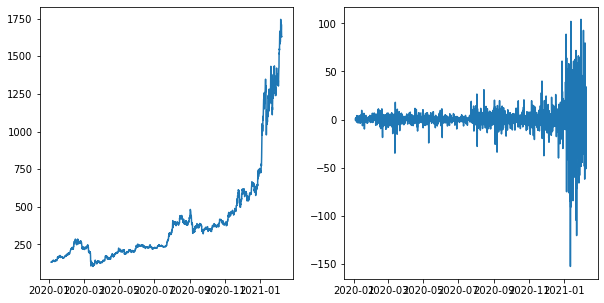

In [ ]:
file = file_list[1]
print(file)

import pandas as pd
import matplotlib.pyplot as plt

ohlcv = pd.read_excel(file, index_col=0)
print(len(ohlcv))
print(ohlcv.head())

close = ohlcv.iloc[:, [3]]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(close)


diff_close = ohlcv.diff(periods=1).iloc[1:, [3]]
plt.subplot(122)
plt.plot(diff_close)
plt.show()

### ARIMA

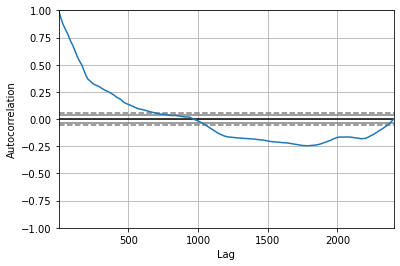

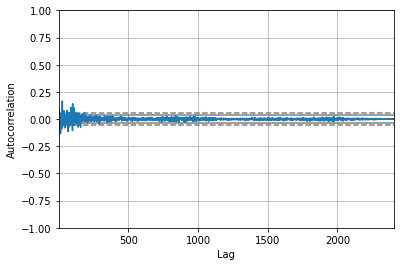

In [ ]:
from pandas.plotting import autocorrelation_plot

# plt.figure(figsize=(10, 7), dpi=80)
# plt.subplot(121)
autocorrelation_plot(close)
plt.show()

# plt.subplot(122)
autocorrelation_plot(diff_close)
plt.show() 

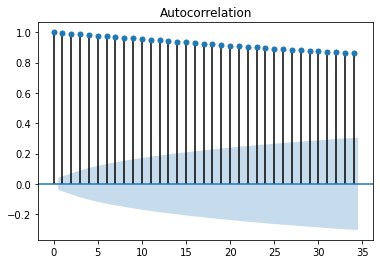

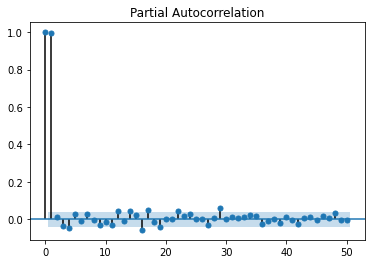

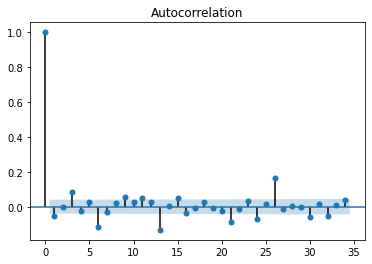

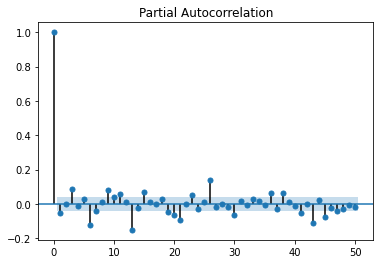

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(close)
plt.show()

plot_pacf(close, lags=50)
plt.show()

plot_acf(diff_close)
plt.show()

plot_pacf(diff_close, lags=50)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

model = ARIMA(close, order=(0, 1, 1))
model_fit = model.fit(trend='c', disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2403
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -9611.709
Method:                       css-mle   S.D. of innovations             13.210
Date:                Mon, 08 Feb 2021   AIC                          19229.419
Time:                        11:37:39   BIC                          19246.772
Sample:                    01-04-2020   HQIC                         19235.731
                         - 02-07-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6225      0.255      2.444      0.015       0.123       1.122
ma.L1.D.close    -0.0546      0.020     -2.718      0.007      -0.094      -0.015
                                    Root

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 4H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 4H will be used.
  % freq, ValueWarning)


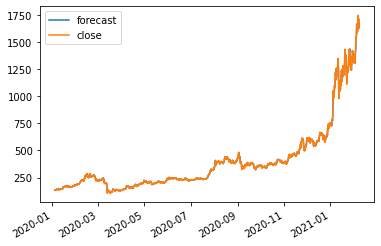

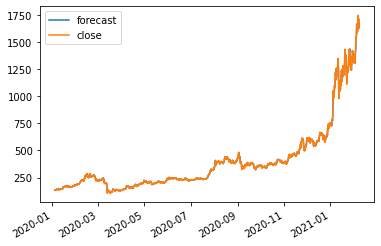

In [ ]:
model_fit.plot_predict()

In [ ]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('\r %.2f%%' % (t / len(test) * 100), end='')

 62.40%

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 99.80%

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.004


### PREDICTION

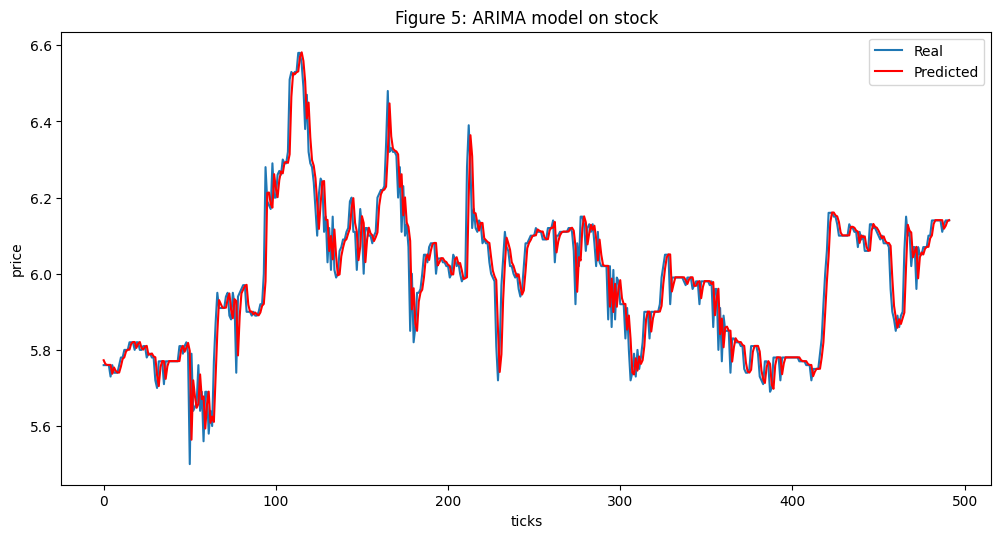

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('ticks')
plt.ylabel('price')
plt.title('Figure 5: ARIMA model on stock')
plt.legend()
plt.show()

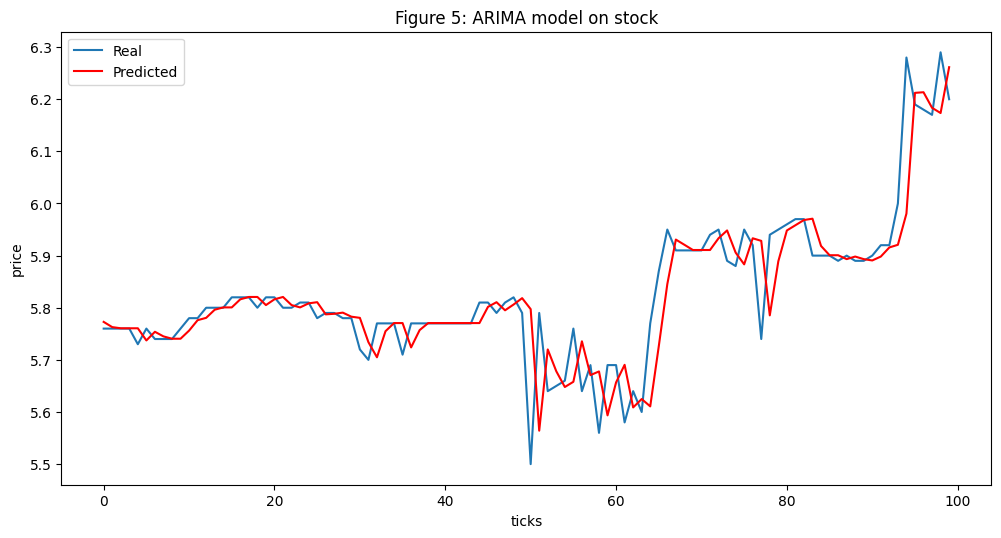

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test[:100], label='Real')
plt.plot(predictions[:100], color='red', label='Predicted')
plt.xlabel('ticks')
plt.ylabel('price')
plt.title('Figure 5: ARIMA model on stock')
plt.legend()
plt.show()